In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
df = pd.read_csv('/content/ACI.csv' , parse_dates=['DATE'])

In [3]:
df.head()


#       DATE TRADING CODE   LTP*  ...    YCP  TRADE  VALUE (mn)  VOLUME
0  439 2018-05-08          ACI  375.0  ...  361.8    453      13.478  36,659
1  438 2018-06-08          ACI  373.0  ...  370.6    759      25.894  69,069
2  437 2018-07-08          ACI  373.6  ...  373.8    368      11.013  29,387
3  436 2018-08-08          ACI  369.8  ...  373.0    359       9.561  25,798
4  435 2018-09-08          ACI  365.4  ...  369.1    461      15.324  41,913

[5 rows x 12 columns]

In [4]:

# Compute Daily Return1
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [6]:
df['volatility']= df['daily_ret'].rolling(window=30).std() * np.sqrt(21)
df['volatility'] = df['volatility'].fillna(0.0)

In [7]:
!pip install arch

     |████████████████████████████████| 798kB 5.5MB/s 


In [8]:

import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [10]:
df = df.sort_values(by='DATE')

In [11]:
df.tail(50)

#       DATE TRADING CODE  ...   VOLUME  daily_ret  volatility
419   20 2020-06-07          ACI  ...   69,717   0.024922    0.144775
404   35 2020-06-14          ACI  ...   23,952  -0.018547    0.174457
405   34 2020-06-15          ACI  ...   23,159  -0.024672    0.175448
406   33 2020-06-16          ACI  ...   22,690   0.001076    0.174207
407   32 2020-06-17          ACI  ...   35,109  -0.000538    0.174205
408   31 2020-06-18          ACI  ...   46,887   0.035503    0.176119
409   30 2020-06-21          ACI  ...   27,259  -0.005195    0.176244
410   29 2020-06-22          ACI  ...   54,425   0.000000    0.176249
411   28 2020-06-23          ACI  ...   44,237   0.004700    0.175873
412   27 2020-06-24          ACI  ...   21,265   0.000520    0.171929
413   26 2020-06-25          ACI  ...   38,716   0.003117    0.168949
414   25 2020-06-28          ACI  ...   87,198   0.023304    0.164264
415   24 2020-06-29          ACI  ...   87,537   0.016194    0.164692
416   23 2020-06-30          ACI  ...   96,941   0.016932    0.159660
338  101 2020-07-01          ACI  ...   33,104   0.001075    0.192596
399   40 2020-07-06          ACI  ...   41,768   0.012500    0.172974
420   19 2020-07-07          ACI  ...   98,599   0.022796    0.140764
424   15 2020-07-13          ACI  ...   71,577  -0.020590    0.099903
425   14 2020-07-14          ACI  ...   74,735  -0.007645    0.096766
426   13 2020-07-15          ACI  ...   56,084   0.001926    0.092244
427   12 2020-07-16          ACI  ...   52,204  -0.000481    0.088092
428   11 2020-07-19          ACI  ...   35,399  -0.012500    0.086573
429   10 2020-07-20          ACI  ...   58,212   0.004869    0.086165
430    9 2020-07-21          ACI  ...   64,406   0.014535    0.084444
431    8 2020-07-22          ACI  ...   61,222   0.004298    0.084310
432    7 2020-07-23          ACI  ...   61,508   0.001902    0.082741
433    6 2020-07-26          ACI  ...  181,208   0.060750    0.093790
434    5 2020-07-27          ACI  ...  206,465   0.049217    0.098532
435    4 2020-07-28          ACI  ...   93,345  -0.021322    0.097785
436    3 2020-07-29          ACI  ...  136,307   0.040523    0.101472
437    2 2020-07-30          ACI  ...  101,852   0.014657    0.101278
339  100 2020-08-01          ACI  ...   15,601  -0.010741    0.188609
381   58 2020-08-03          ACI  ...   16,540  -0.010995    0.120402
400   39 2020-08-06          ACI  ...   35,231  -0.020576    0.173692
421   18 2020-08-07          ACI  ...  106,796  -0.005944    0.130902
340   99 2020-09-01          ACI  ...   24,220  -0.007058    0.175315
361   78 2020-09-02          ACI  ...   28,537  -0.003335    0.123751
382   57 2020-09-03          ACI  ...   57,015  -0.040022    0.123859
401   38 2020-09-06          ACI  ...  132,149   0.008929    0.173851
422   17 2020-09-07          ACI  ...  167,651   0.036373    0.128125
362   77 2020-10-02          ACI  ...   10,493  -0.005577    0.123136
383   56 2020-10-03          ACI  ...   22,798   0.041112    0.129510
402   37 2020-10-06          ACI  ...   32,246  -0.015617    0.172602
363   76 2020-11-02          ACI  ...   10,424   0.012900    0.123616
384   55 2020-11-03          ACI  ...   42,684   0.053393    0.137608
403   36 2020-11-06          ACI  ...   28,739   0.026441    0.173821
341   98 2020-12-01          ACI  ...   23,459   0.013669    0.174293
364   75 2020-12-02          ACI  ...   39,706  -0.007752    0.123681
385   54 2020-12-03          ACI  ...   28,919   0.002640    0.121239
423   16 2020-12-07          ACI  ...  118,840   0.027404    0.129111

[50 rows x 14 columns]

In [12]:

start = datetime(2018,1,10)
end = datetime(2020,12,7)

In [15]:
df.index = pd.to_datetime(df['DATE'])

KeyError: ignored

In [14]:
df = df.set_index('DATE')


In [16]:
volatility = df['volatility']*100

Text(0.5, 1.0, ' actual volatility')

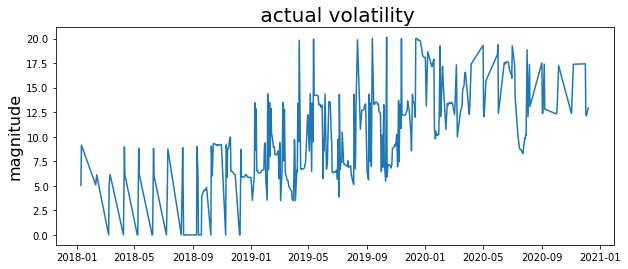

In [17]:
plt.figure(figsize=(10,4))
plt.plot(volatility)
plt.ylabel('magnitude', fontsize=16)
plt.title(' actual volatility', fontsize=20)

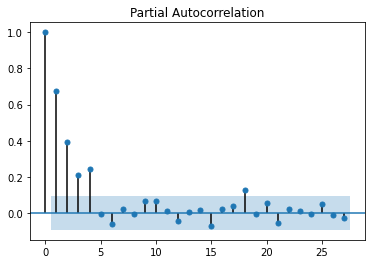

In [18]:

plot_pacf(volatility**2)
plt.show()

In [19]:
model = arch_model(volatility, p=5, q=5)

In [20]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     14,   Neg. LLF: 1284.2985323544617
Iteration:      2,   Func. Count:     29,   Neg. LLF: 1279.700703050436
Iteration:      3,   Func. Count:     45,   Neg. LLF: 1279.1220747425878
Iteration:      4,   Func. Count:     60,   Neg. LLF: 1278.813523808207
Iteration:      5,   Func. Count:     75,   Neg. LLF: 1276.1846235126463
Iteration:      6,   Func. Count:     90,   Neg. LLF: 1273.8150779262473
Iteration:      7,   Func. Count:    105,   Neg. LLF: 1272.7541098337963
Iteration:      8,   Func. Count:    119,   Neg. LLF: 1268.137777823794
Iteration:      9,   Func. Count:    134,   Neg. LLF: 1268.025569386536
Iteration:     10,   Func. Count:    149,   Neg. LLF: 1267.1368954724499
Iteration:     11,   Func. Count:    163,   Neg. LLF: 1266.5436022592262
Iteration:     12,   Func. Count:    178,   Neg. LLF: 1266.45334311149
Iteration:     13,   Func. Count:    192,   Neg. LLF: 1266.4137839042714
Iteration:     14,   Func. Count:    206,   Neg. LLF: 126

In [21]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:             volatility   R-squared:                      -0.008
Mean Model:             Constant Mean   Adj. R-squared:                 -0.008
Vol Model:                      GARCH   Log-Likelihood:               -1266.41
Distribution:                  Normal   AIC:                           2556.82
Method:            Maximum Likelihood   BIC:                           2605.83
                                        No. Observations:                  439
Date:                Tue, Dec 08 2020   Df Residuals:                      427
Time:                        07:25:49   Df Model:                           12
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             9.4670      8.421      1.124      0.261 [ -7.038, 25.972]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          6.6080     56.406      0.117      0.907 [-1.039e+02,1.172e+02]
alpha[1]       0.2893      4.419  6.547e-02      0.948      [ -8.371,  8.950]
alpha[2]       0.0341      9.764  3.495e-03      0.997      [-19.103, 19.171]
alpha[3]       0.1600      3.817  4.191e-02      0.967      [ -7.322,  7.642]
alpha[4]       0.2322      4.118  5.639e-02      0.955      [ -7.838,  8.303]
alpha[5]       0.0000      2.661      0.000      1.000      [ -5.215,  5.215]
beta[1]        0.0000     27.361      0.000      1.000      [-53.627, 53.627]
beta[2]    1.0902e-13     22.354  4.877e-15      1.000      [-43.813, 43.813]
beta[3]    4.1415e-13      3.829  1.082e-13      1.000      [ -7.505,  7.505]
beta[4]    5.7743e-13      7.607  7.591e-14      1.000      [-14.909, 14.909]
beta[5]    8.8871e-13     14.955  5.942e-14      1.000      [-29.312, 29.312]
=============================================================================

Covariance estimator: robust
"""

In [23]:
rolling_predictions = []
test_size = 400

for i in range(test_size):
    train = volatility[:-(test_size-i)]
    model = arch_model(train, p=5, q=5)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [24]:
rolling_predictions = pd.Series(rolling_predictions, index=volatility.index[-400:])

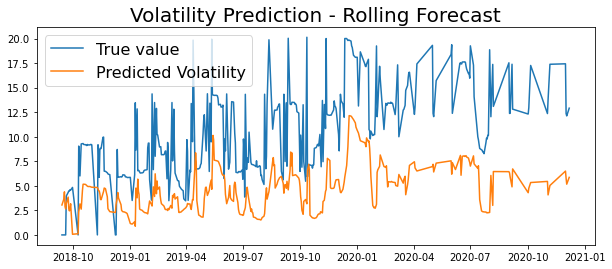

In [25]:
plt.figure(figsize=(10,4))
true, = plt.plot(volatility[-400:])
preds, = plt.plot(rolling_predictions)

plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True value', 'Predicted Volatility'], fontsize=16)

In [26]:

train = volatility
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [27]:
pred = model_fit.forecast(horizon=10)
future_dates = [volatility.index[-1] + timedelta(days=i) for i in range(1,11)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 10 Days')

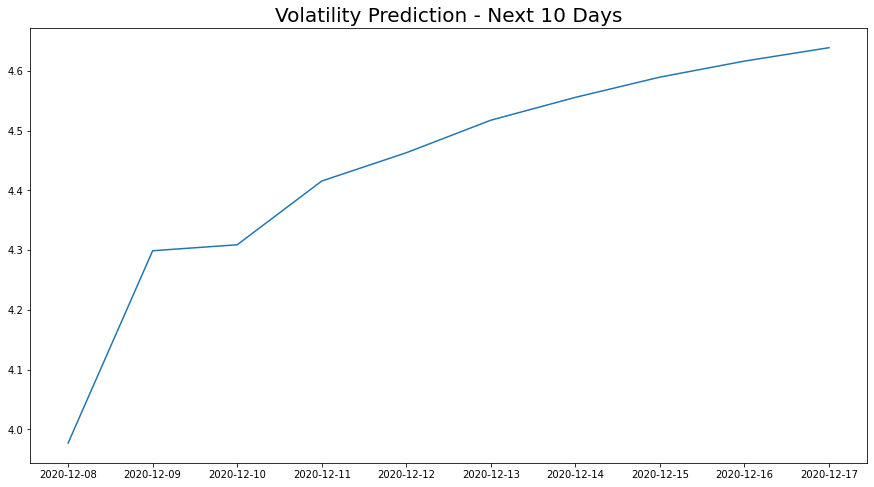

In [28]:
plt.figure(figsize=(15,8))
plt.plot(pred)
plt.title('Volatility Prediction - Next 10 Days', fontsize=20)

In [36]:
df['predicted']=pred

In [37]:
df['predicted']=df['predicted'].fillna(0.0)

In [38]:
import math


In [40]:
from sklearn.metrics import mean_squared_error

rmse =mean_squared_error(volatility, df.predicted,squared=False)

print(rmse)


10.999605168143548
